In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris 
iris = load_iris() 
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:

print(iris['DESCR'][:193]+'\n...')

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
type(iris['data'])

numpy.ndarray

In [12]:
iris['data'].shape

(150, 4)

In [13]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [14]:
type(iris['target'])

numpy.ndarray

In [15]:
iris['target'].shape

(150,)

In [16]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# meaning of the above numbers are 0=setosa, versicolor=1, Virginica=2 

In [17]:
# MEASURING SUCCESS: TRAINING AND TESTING DATA

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(iris['data'],iris['target'],random_state=0)


# THE ABOVE FUNCTION SPILTS THE DATA INTO 75% TRAINING AND 25% TESTING.

In [19]:
X_train.shape

(112, 4)

In [20]:
X_test.shape

(38, 4)

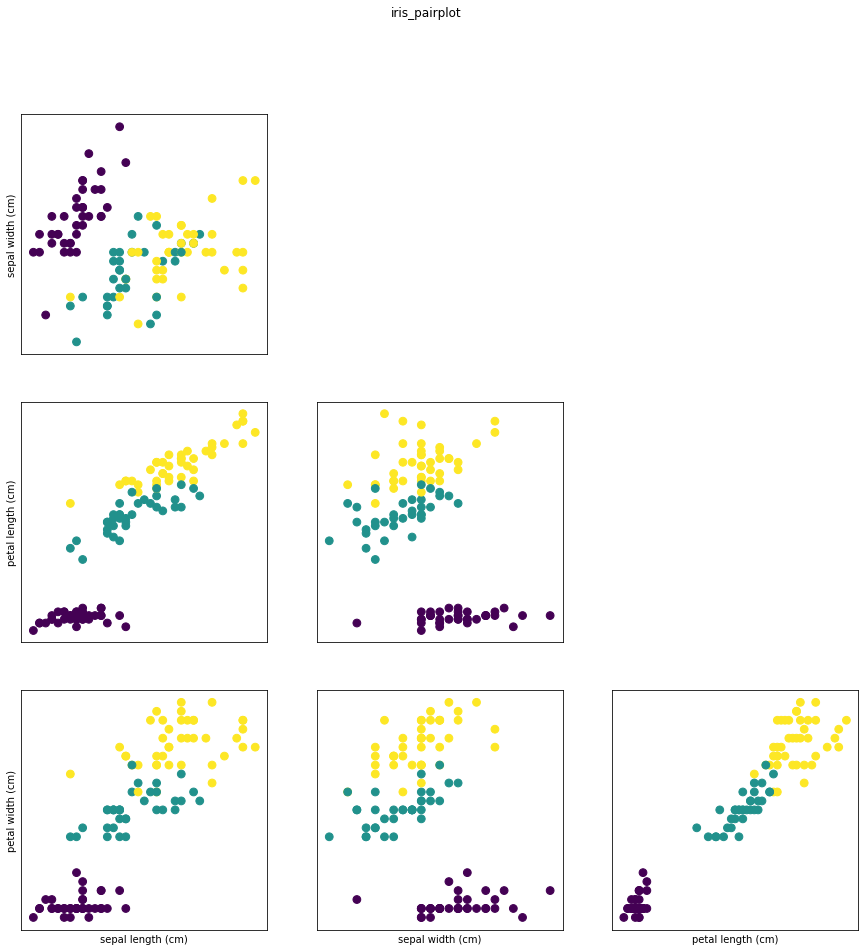

In [27]:
fig,ax=plt.subplots(3, 3,figsize=(15,15))
plt.suptitle("iris_pairplot")
for i in range(3):
    for j in range(3):
        ax[i,j].scatter(X_train[:,j],X_train[:,i+1],c=Y_train,s=60)
        ax[i,j].set_xticks(())
        ax[i,j].set_yticks(())
        if i==2:
            ax[i,j].set_xlabel(iris['feature_names'][j])
        if j==0:
            ax[i,j].set_ylabel(iris['feature_names'][i+1])
        if j>i:
            ax[i,j].set_visible(False)

#  DATA POINTS ARE COLORED ACCORDING TO TO DIFFERENT SPECIES OF IRIS. 

In [28]:
# BULIDING MODEL USING K NEAREST NEIGHBORS

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)

In [32]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

# Imagine we found an iris in the wild with a sepal length of 5cm, a sepal width of 2.9cm, a petal length of 1cm and a petal width of 0.2cm. What species of iris would this be? We can put this data into a numpy array, again with the shape number of samples (one) times number of features (four):

In [33]:
X_new=np.array([[5,2.9,1,0.2]])
X_new.shape

(1, 4)

In [34]:
prediction=knn.predict(X_new)
prediction

array([0])

In [35]:
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

In [36]:
Y_pred=knn.predict(X_test)
np.mean(Y_pred==Y_test)

0.9736842105263158

In [37]:
knn.score(X_test,Y_test)

0.9736842105263158